In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
spotify = pd.read_csv ('songs_normalize.csv')

In [3]:
spotify

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [5]:
spotify.duplicated().value_counts()

False    1941
True       59
Name: count, dtype: int64

In [6]:
spotify.drop_duplicates(inplace=True)

## Questions

1. How does song duration vary across different genres?
2. Is there a correlation between song popularity and explicit content?
3. What is the distribution of danceability scores across different years?
4. Are there any trends in energy levels of songs over the years?
5. How does the average popularity of top hits vary among the top 10 artists, and how does the number of total songs they have relate to this popularity?
6. What is the distribution of songs with and without explicit content in the dataset?
7. What is the relationship between acousticness and song valence?
8. Are there notable differences in tempo across various modes (major vs. minor)?
9. How has the popularity of genres evolved over the years?
10. Is there a relationship between song liveliness and its instrumentalness?

In [7]:
def extract_first_word(genre):
    return genre.split(',')[0].strip().split()[0]

spotify['first_word'] = spotify['genre'].apply(extract_first_word)


In [9]:
spotify= spotify.drop(columns=['genre'])

In [11]:
spotify = spotify.rename(columns={'first_word': 'genre'})

In [13]:
spotify

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,hip
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


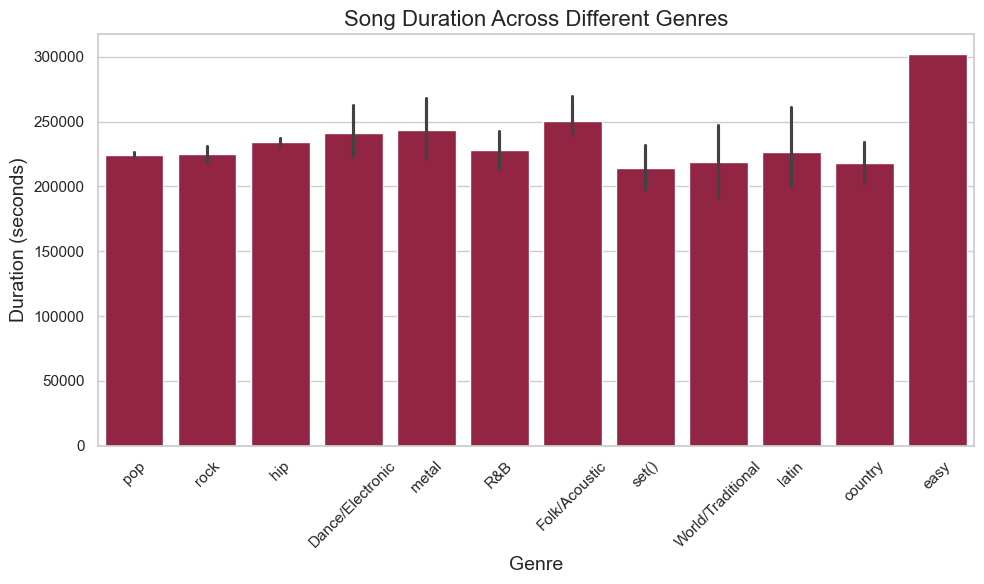

Song Duration Across Different Genres:
genre
easy                 302146.000000
Folk/Acoustic        250755.000000
metal                243625.000000
Dance/Electronic     241092.390244
hip                  233967.371162
R&B                  227837.076923
latin                226330.733333
rock                 225178.161290
pop                  224497.585526
World/Traditional    219063.800000
country              217737.100000
set()                214065.409091
Name: duration_ms, dtype: float64


In [38]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='genre', y='duration_ms', data=spotify, color='#a4133c')

plt.title('Song Duration Across Different Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Duration (seconds)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Song Duration Across Different Genres:")
print(spotify.groupby('genre')['duration_ms'].mean().sort_values(ascending=False))

Correlation between song popularity and explicit content: 0.05


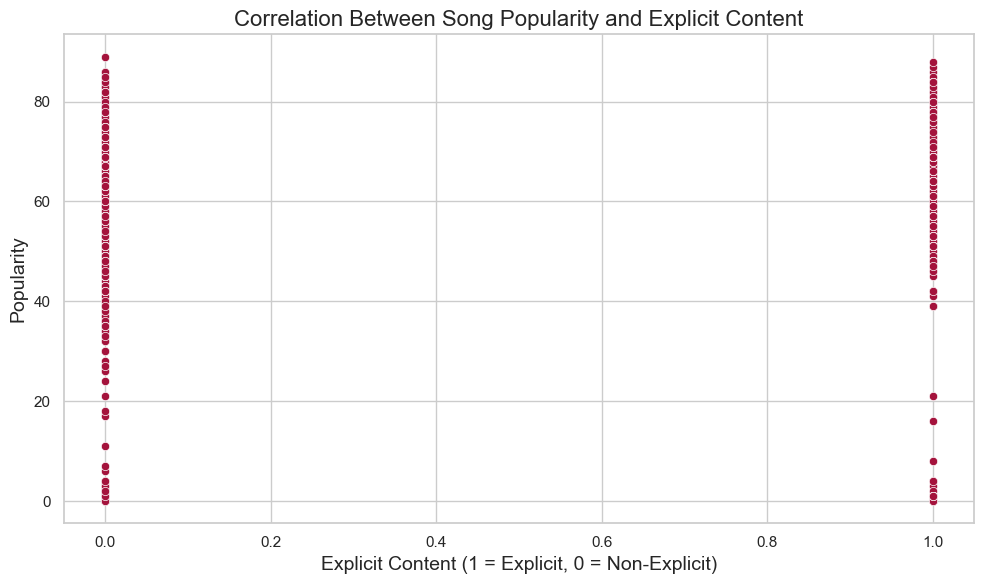

In [16]:
correlation = spotify['popularity'].corr(spotify['explicit'])
print(f"Correlation between song popularity and explicit content: {correlation:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='explicit', y='popularity', data=spotify , color='#a4133c')

plt.title('Correlation Between Song Popularity and Explicit Content', fontsize=16)
plt.xlabel('Explicit Content (1 = Explicit, 0 = Non-Explicit)', fontsize=14)
plt.ylabel('Popularity', fontsize=14)


plt.tight_layout()
plt.show()

Summary Statistics of Danceability Scores by Year:
    year      mean  median       std
0   1998  0.727000  0.7270       NaN
1   1999  0.668974  0.6860  0.144164
2   2000  0.690817  0.7080  0.131179
3   2001  0.674698  0.6795  0.147639
4   2002  0.674128  0.6940  0.136881
5   2003  0.666033  0.6630  0.153954
6   2004  0.694779  0.7060  0.141264
7   2005  0.674020  0.6780  0.169362
8   2006  0.663462  0.6870  0.173415
9   2007  0.626589  0.6385  0.148205
10  2008  0.667505  0.6740  0.127826
11  2009  0.623915  0.6305  0.159903
12  2010  0.660417  0.6750  0.115829
13  2011  0.634531  0.6450  0.123291
14  2012  0.636257  0.6580  0.124234
15  2013  0.632667  0.6470  0.114404
16  2014  0.666670  0.6745  0.129170
17  2015  0.650538  0.6670  0.145728
18  2016  0.668510  0.6715  0.129200
19  2017  0.693482  0.7005  0.131373
20  2018  0.728019  0.7385  0.126570
21  2019  0.719764  0.7400  0.124389
22  2020  0.745333  0.8360  0.189985


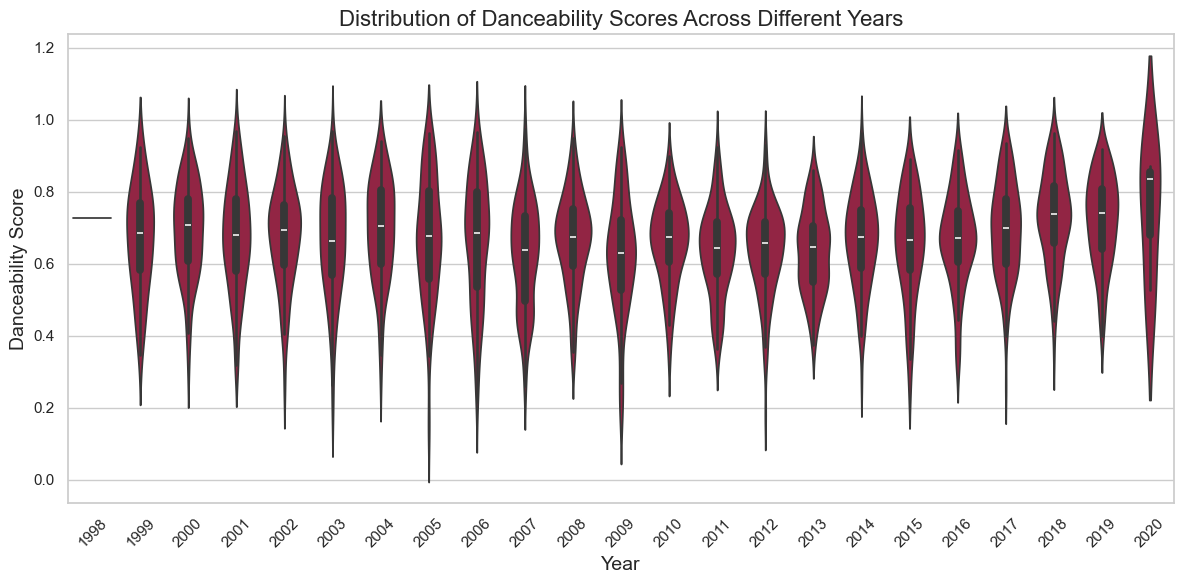

In [35]:
summary_stats = spotify.groupby('year')['danceability'].agg(['mean', 'median', 'std']).reset_index()
print("Summary Statistics of Danceability Scores by Year:")
print(summary_stats)

plt.figure(figsize=(12, 6))
sns.violinplot(x='year', y='danceability', data=spotify, color='#a4133c') 

plt.title('Distribution of Danceability Scores Across Different Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Danceability Score', fontsize=14)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
pip install --upgrade seaborn pandas

Note: you may need to restart the kernel to use updated packages.


Average Energy Levels Per Year:
    year    energy
0   1998  0.445000
1   1999  0.738421
2   2000  0.747901
3   2001  0.728086
4   2002  0.724512
5   2003  0.706473
6   2004  0.735821
7   2005  0.702584
8   2006  0.704785
9   2007  0.765489
10  2008  0.754593
11  2009  0.753402
12  2010  0.776893
13  2011  0.756167
14  2012  0.770858
15  2013  0.712355
16  2014  0.723570
17  2015  0.693774
18  2016  0.678520
19  2017  0.688855
20  2018  0.645298
21  2019  0.663921
22  2020  0.785000


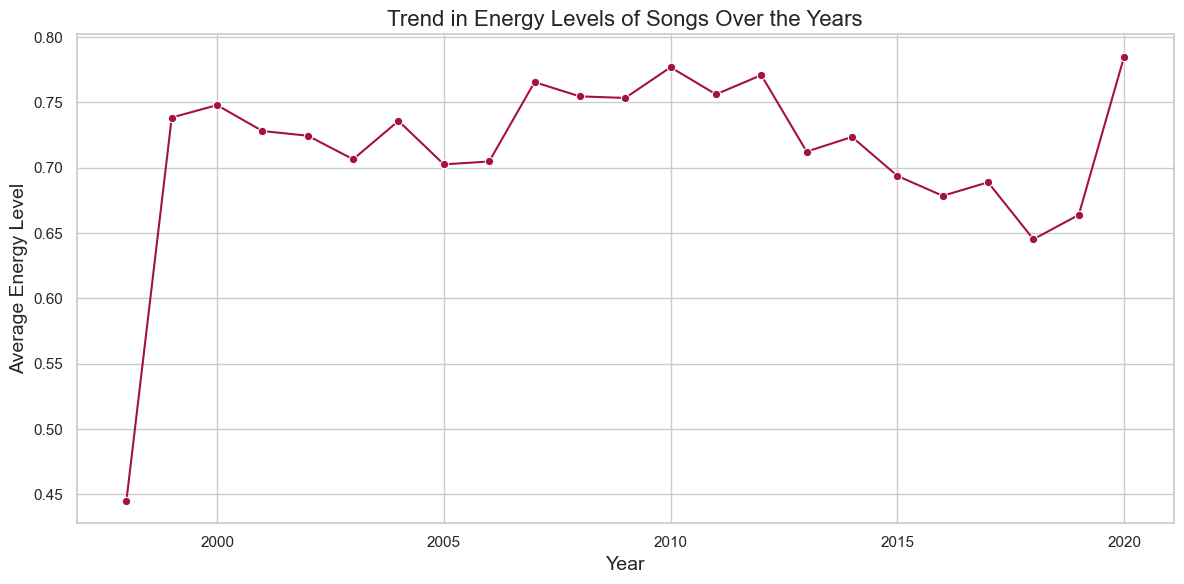

In [19]:
average_energy_per_year = spotify.groupby('year')['energy'].mean().reset_index()
print("Average Energy Levels Per Year:")
print(average_energy_per_year)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='energy', data=average_energy_per_year, marker='o', color='#a4133c')
plt.title('Trend in Energy Levels of Songs Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Energy Level', fontsize=14)
plt.tight_layout()
plt.show()


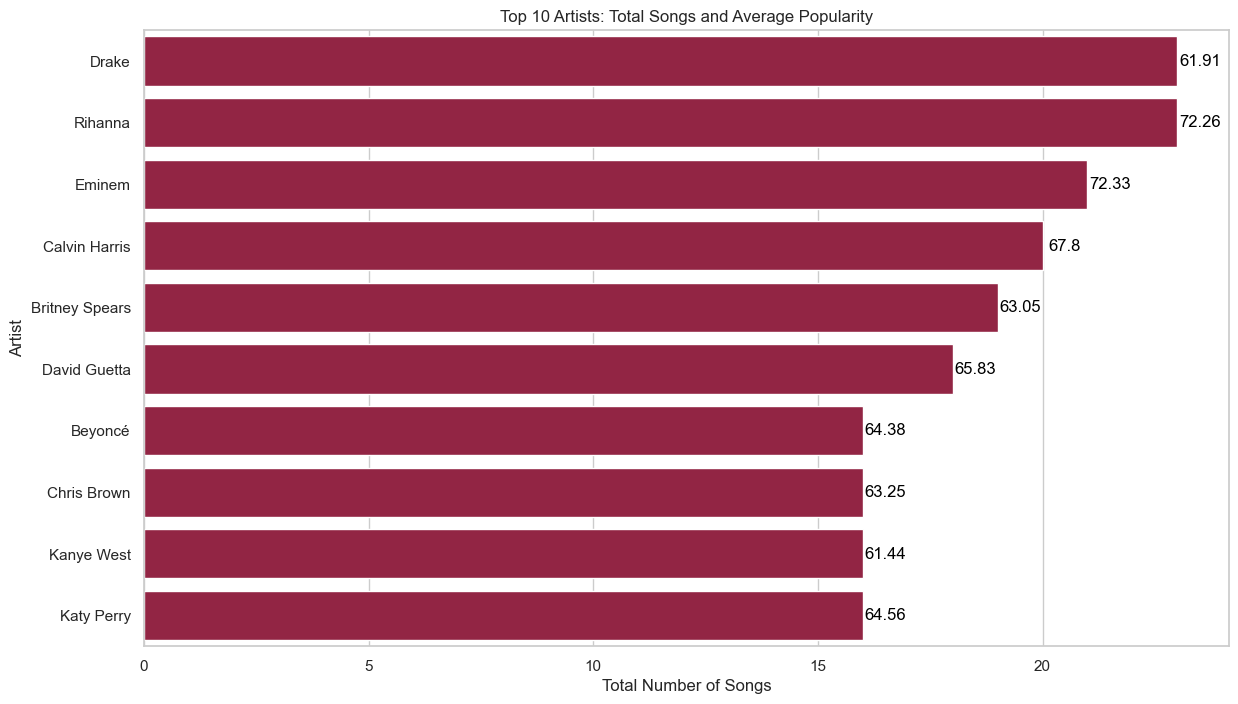

Top 10 Artists: Total Songs and Average Popularity
             artist  total_songs  average_popularity
219           Drake           23           61.913043
628         Rihanna           23           72.260870
239          Eminem           21           72.333333
127   Calvin Harris           20           67.800000
118  Britney Spears           19           63.052632
196    David Guetta           18           65.833333
90          Beyoncé           16           64.375000
156     Chris Brown           16           63.250000
387      Kanye West           16           61.437500
391      Katy Perry           16           64.562500


In [39]:
plt.figure(figsize=(14, 8))
sns.barplot(
    x='total_songs', 
    y='artist', 
    data=top_10_artists, 
    orient='h',
    color='#a4133c'  
)
for i in range(top_10_artists.shape[0]):
    plt.text(
        top_10_artists['total_songs'].iloc[i] + 0.5, 
        i, 
        round(top_10_artists['average_popularity'].iloc[i], 2), 
        ha='center', 
        va='center',
        color='black'
    )

plt.title('Top 10 Artists: Total Songs and Average Popularity')
plt.xlabel('Total Number of Songs')
plt.ylabel('Artist')
plt.show()
print("Top 10 Artists: Total Songs and Average Popularity")
print(top_10_artists[['artist', 'total_songs', 'average_popularity']])

  explicit  count
0      NaN   1404
1      NaN    537


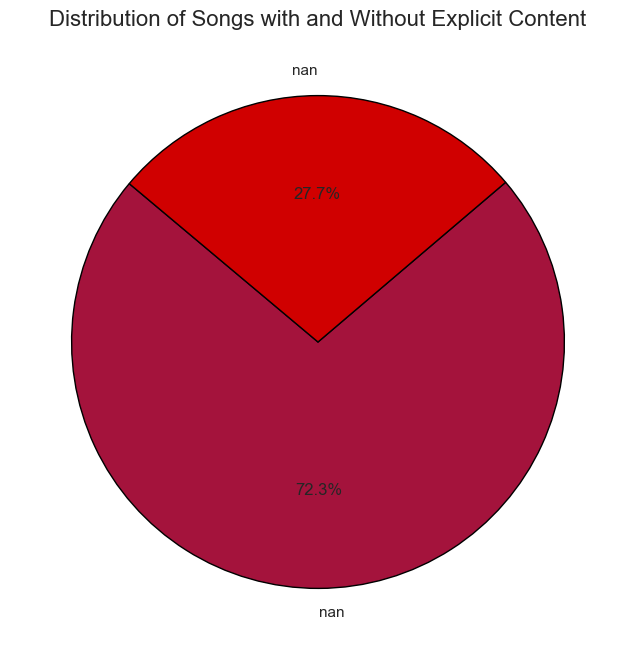

In [26]:
explicit_counts = spotify['explicit'].value_counts().reset_index()
explicit_counts.columns = ['explicit', 'count']
explicit_counts['explicit'] = explicit_counts['explicit'].map({0: 'No', 1: 'Yes'})

print(explicit_counts)

plt.figure(figsize=(8, 8))
plt.pie(
    explicit_counts['count'],
    labels=explicit_counts['explicit'],
    autopct='%1.1f%%',
    colors=['#a4133c', '#d00000'],
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Distribution of Songs with and Without Explicit Content', fontsize=16)
plt.show()


   mode       tempo
0     0  118.733563
1     1  121.308694


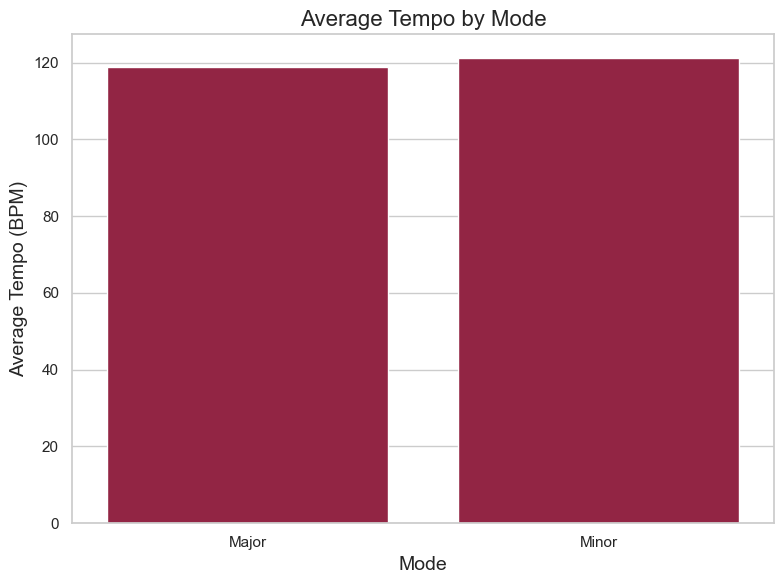

In [28]:
mode_tempo = spotify.groupby('mode')['tempo'].mean().reset_index()

print(mode_tempo)

plt.figure(figsize=(8, 6))
sns.barplot(x='mode', y='tempo', data=mode_tempo, color='#a4133c')

plt.title('Average Tempo by Mode', fontsize=16)
plt.xlabel('Mode', fontsize=14)
plt.ylabel('Average Tempo (BPM)', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Major', 'Minor'])
plt.tight_layout()
plt.show()

Correlation coefficient between liveness and instrumentalness: -0.03


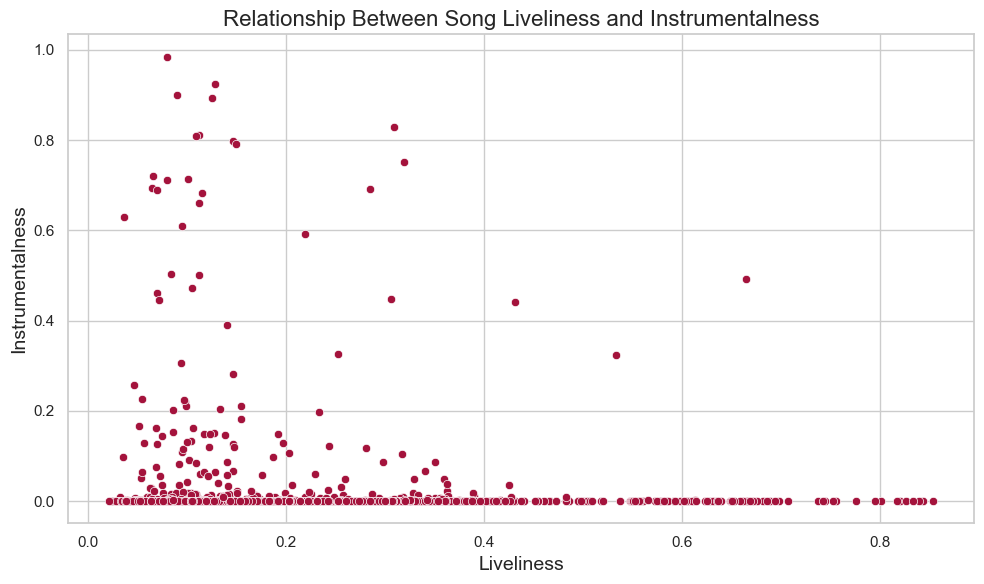

In [29]:
correlation = spotify[['liveness', 'instrumentalness']].corr().iloc[0, 1]
print(f"Correlation coefficient between liveness and instrumentalness: {correlation:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='liveness', y='instrumentalness', data=spotify, color='#a4133c')

plt.title('Relationship Between Song Liveliness and Instrumentalness', fontsize=16)
plt.xlabel('Liveliness', fontsize=14)
plt.ylabel('Instrumentalness', fontsize=14)
plt.tight_layout()
plt.show()

Correlation coefficient between acousticness and valence: -0.13


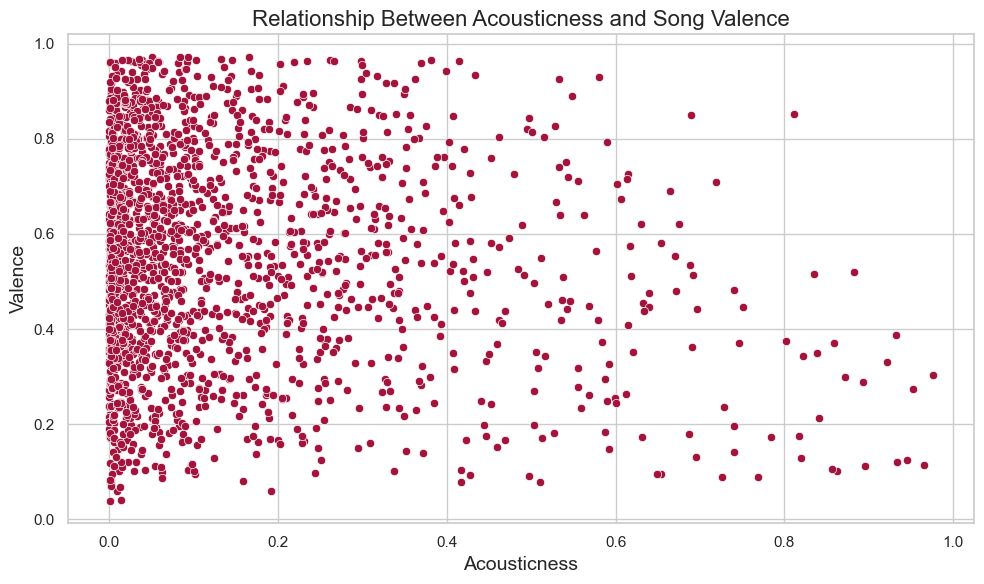

In [31]:
correlation = spotify[['acousticness', 'valence']].corr().iloc[0, 1]
print(f"Correlation coefficient between acousticness and valence: {correlation:.2f}")

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='acousticness', y='valence', data=spotify, color='#a4133c')

plt.title('Relationship Between Acousticness and Song Valence', fontsize=16)
plt.xlabel('Acousticness', fontsize=14)
plt.ylabel('Valence', fontsize=14)
plt.tight_layout()
plt.show()

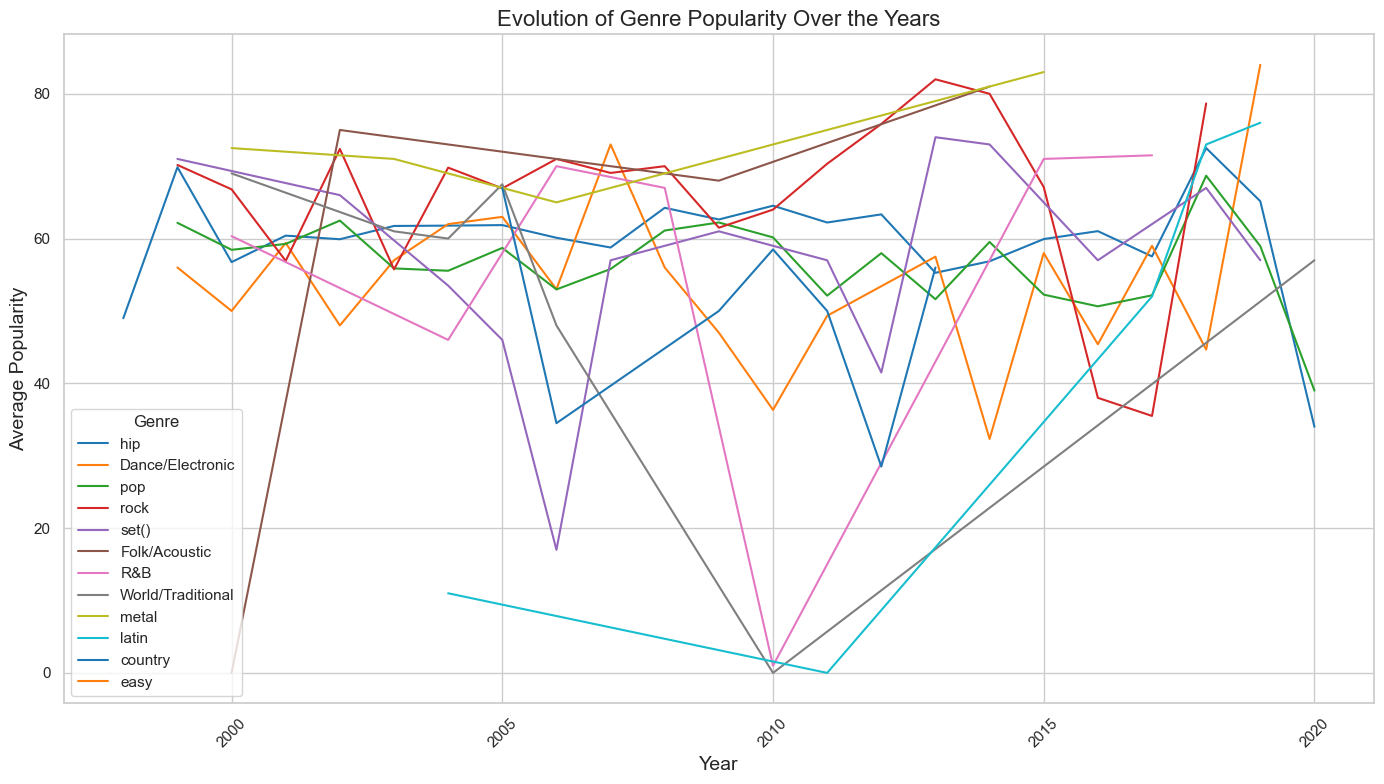

     year              genre  popularity
0    1998                hip   49.000000
1    1999   Dance/Electronic   56.000000
2    1999                hip   69.857143
3    1999                pop   62.173913
4    1999               rock   70.166667
..    ...                ...         ...
129  2019                pop   58.953488
130  2019              set()   57.000000
131  2020  World/Traditional   57.000000
132  2020                hip   34.000000
133  2020                pop   39.000000

[134 rows x 3 columns]


In [33]:
genre_popularity_over_time = spotify.groupby(['year', 'genre'])['popularity'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='popularity', hue='genre', data=genre_popularity_over_time, palette='tab10')

plt.title('Evolution of Genre Popularity Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)
plt.legend(title='Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(genre_popularity_over_time)